# **1. IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

# **2. EXPLORATORY DATA ANALYSIS**

In [2]:
# import dan preview dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_excel('/content/drive/My Drive/Date_Fruit_Datasets.xlsx')
df

Mounted at /content/drive


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [3]:
# Kolom dan informasi untuk tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [4]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
AREA,898.000000,298295.207127,107245.205337,1987.000000,206948.000000,319833.000000,382573.000000,546063.000000
PERIMETER,898.000000,2057.660953,410.012459,911.828000,1726.091500,2196.345450,2389.716575,2811.997100
MAJOR_AXIS,898.000000,750.811994,144.059326,336.722700,641.068650,791.363400,858.633750,1222.723000
MINOR_AXIS,898.000000,495.872785,114.268917,2.283200,404.684375,495.054850,589.031700,766.453600
ECCENTRICITY,898.000000,0.737468,0.088727,0.344800,0.685625,0.754700,0.802150,1.000000
EQDIASQ,898.000000,604.577938,119.593888,50.298400,513.317075,638.140950,697.930525,833.827900
SOLIDITY,898.000000,0.981840,0.018157,0.836600,0.978825,0.987300,0.991800,0.997400
CONVEX_AREA,898.000000,303845.592428,108815.656947,2257.000000,210022.750000,327207.000000,388804.000000,552598.000000
EXTENT,898.000000,0.736267,0.053745,0.512300,0.705875,0.746950,0.775850,0.856200
ASPECT_RATIO,898.000000,2.131102,17.820778,1.065300,1.373725,1.524150,1.674750,535.525700


<Axes: xlabel='Class'>

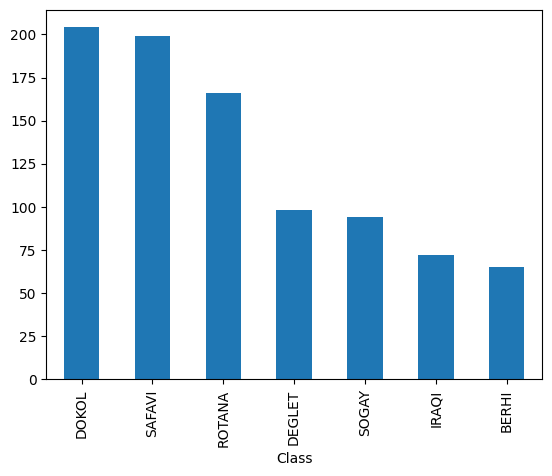

In [5]:
# Melihat komposisi target
jml_category = df.Class.value_counts()
jml_category
jml_category.plot(kind='bar')

In [ ]:
# Pairplot, dan menyimpan hasil-nya
g = sns.pairplot(df, hue="Class")
g.savefig("pairplot.png", dpi=300)

In [ ]:
# Menyimpan hasil pairplot ke dalam google drive
!cp pairplot.png "/content/drive/My Drive/pairplot.png"
print("File berhasil disimpan di Google Drive!")

File berhasil disimpan di Google Drive!


# **3. DATA PREPROCESSING**

In [6]:
# Melakukan pelabelan pada data Class, untuk mempermudah proses feature selection
le = LabelEncoder()
y = le.fit_transform(df['Class'])
df['Class'] = y
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,6
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,6
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,6
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,6


# **4. MODEL EVALUATION DENGAN PEMILIHAN FITUR**

**4.1. Fitur selection menggunakan Pearson Correlation**

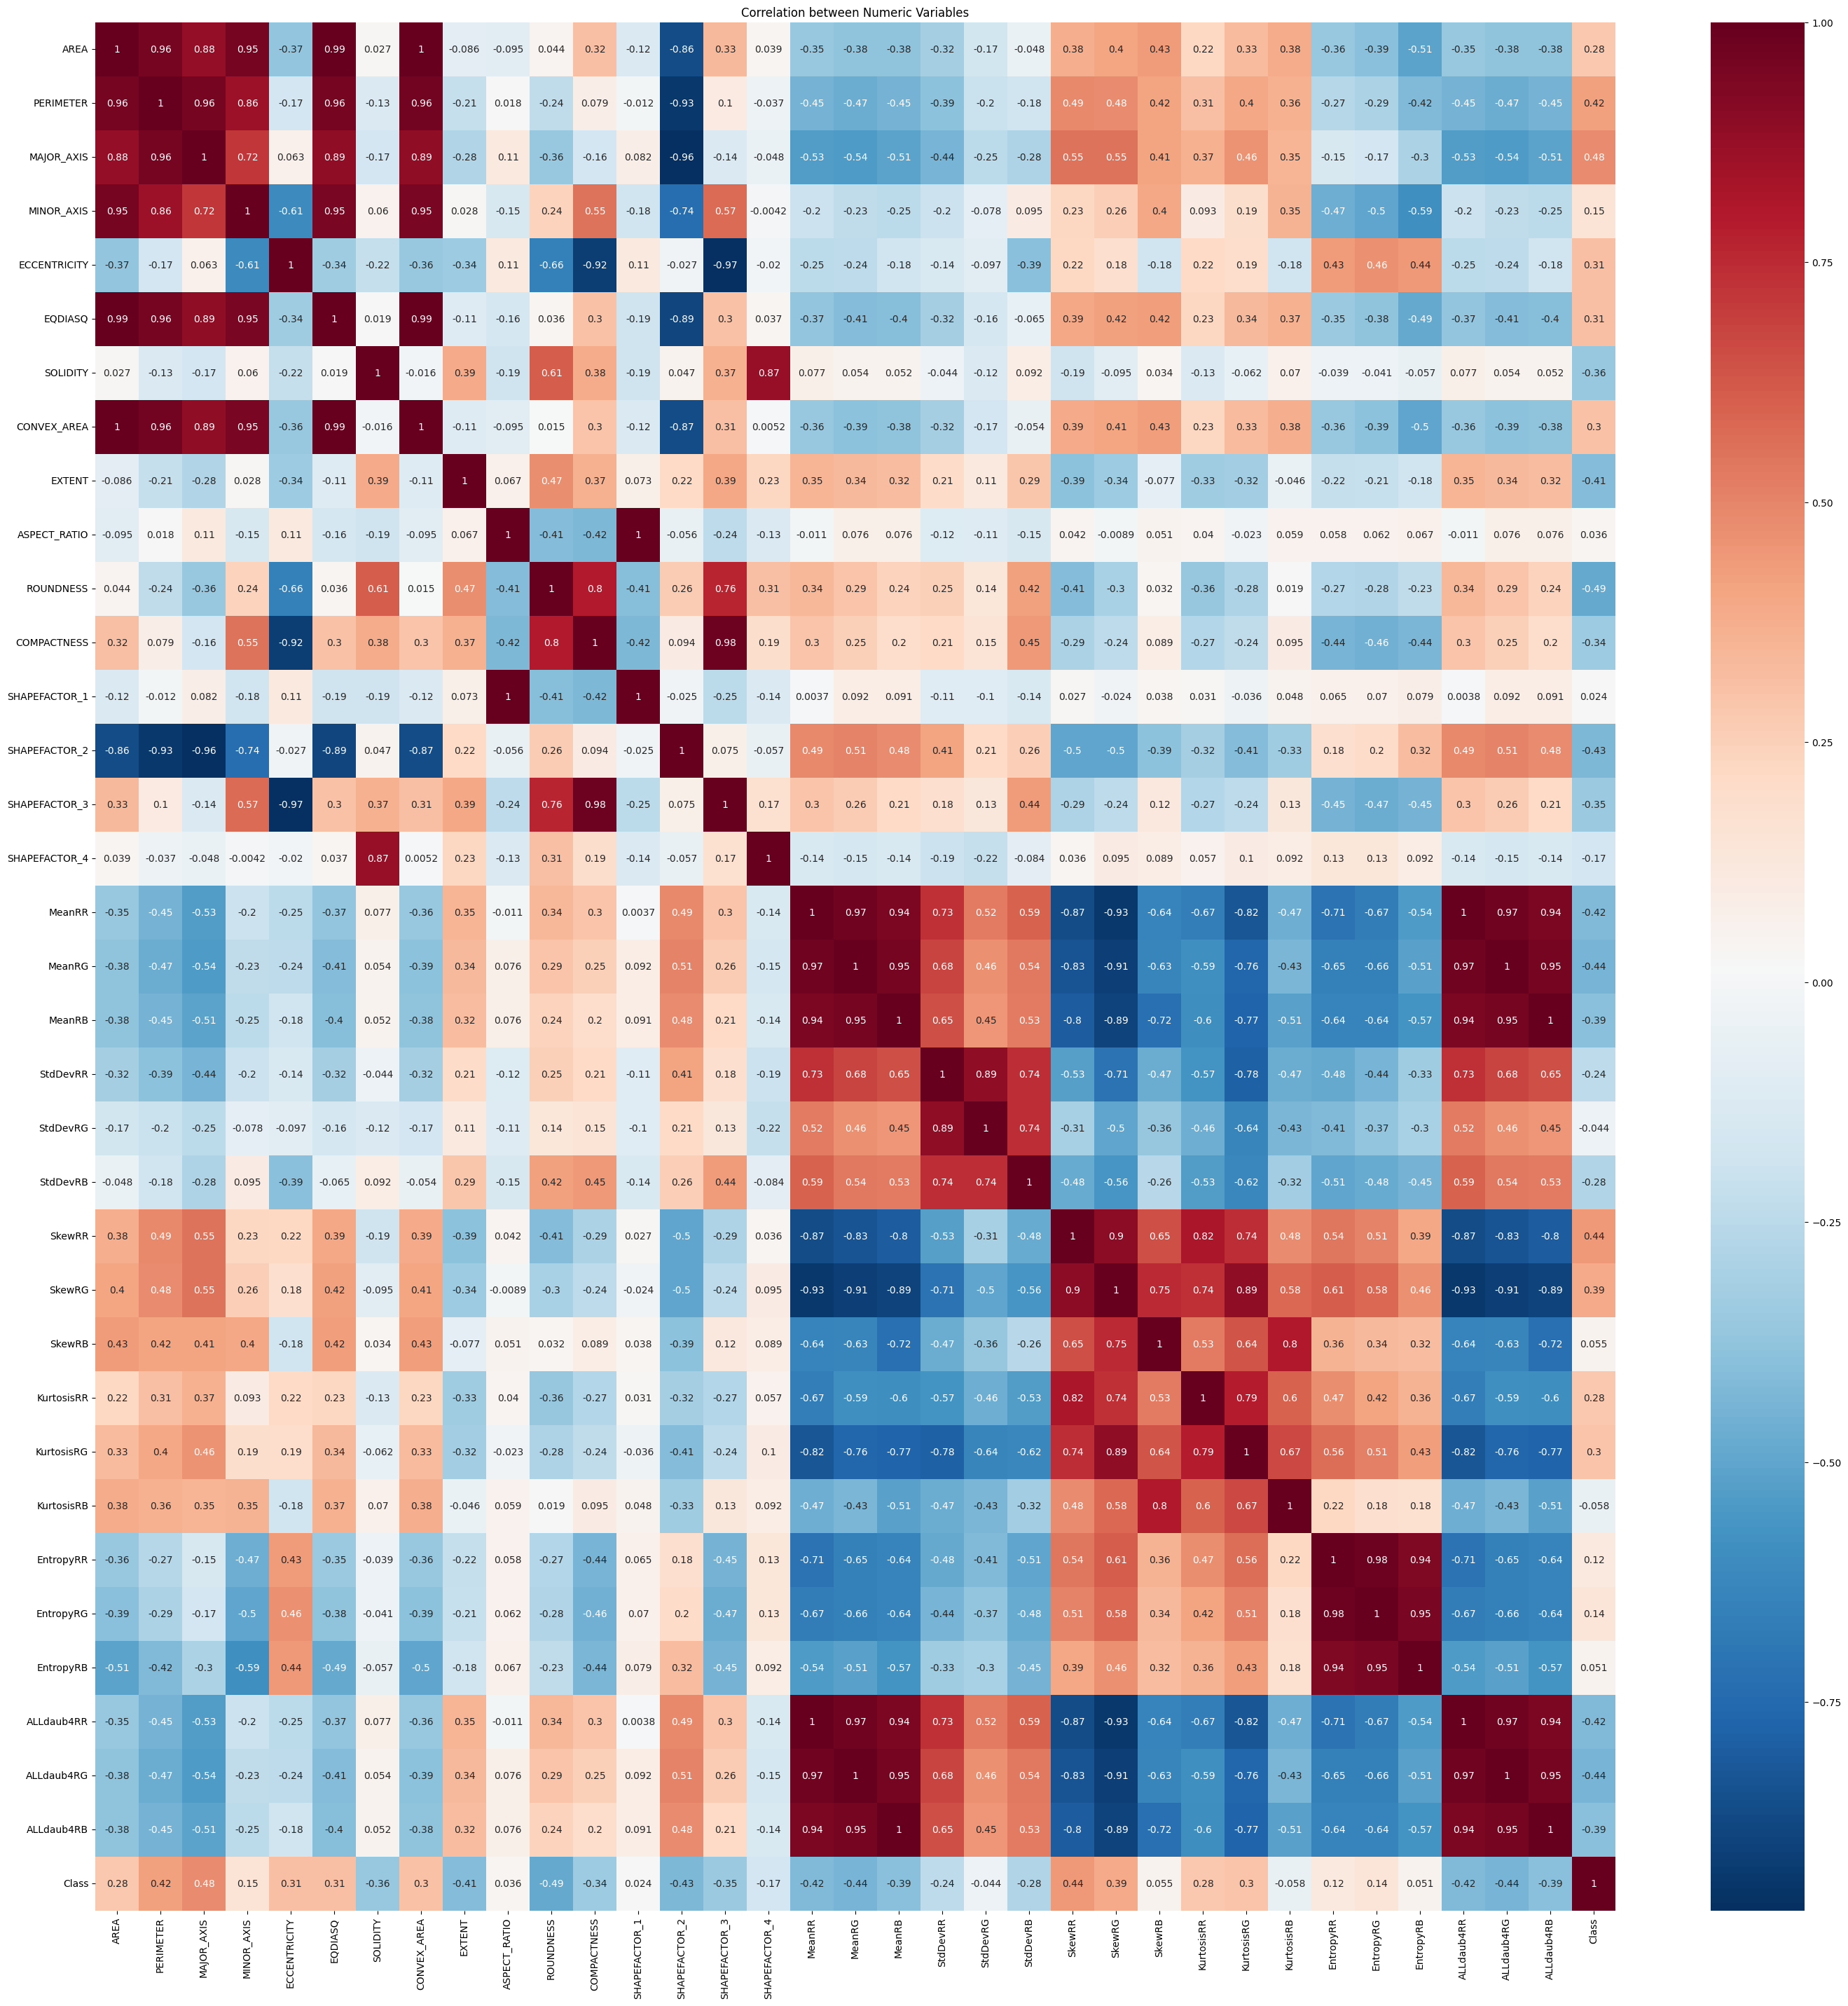

['PERIMETER',
 'MAJOR_AXIS',
 'EXTENT',
 'ROUNDNESS',
 'SHAPEFACTOR_2',
 'MeanRR',
 'MeanRG',
 'SkewRR',
 'ALLdaub4RR',
 'ALLdaub4RG']

In [11]:
corr_pearson = df.corr()

# Menampilkan matrik korelasi dalam grafik heatmap
plt.figure(figsize=(35,35))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

# Mengambil nilai absolut dari korelasi
cor_target = abs(corr_pearson["Class"])

# Memilih Fiture dengan korelasi tinggi (threshold = 0.4)
relevant_features = cor_target[cor_target>0.4]

# Mengumpulkan nama fitur
names = [index for index, value in relevant_features.items()]

# Menghapus variabel target dari hasil
names.remove('Class')

names

**4.2. Mendefinisikan fitur yang sudah diseleksi dan target**

In [12]:
X = df[names]
y = df['Class']

**4.3. Split data test dan training**

In [13]:
# Menggunakan metode hold out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y , random_state = 42)
print('Jumlah Data train: X', X_train.shape, 'Y', y_train.shape)
print('Jumlah Data test: X', X_test.shape, 'Y', y_test.shape)

Jumlah Data train: X (718, 10) Y (718,)
Jumlah Data test: X (180, 10) Y (180,)


**4.4. Scaling Fitur**

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.43309537,  0.94580413, -1.0131019 , ...,  0.41948544,
        -1.56950975, -1.35403963],
       [-1.97381781, -1.92361164,  0.56998646, ..., -0.42558671,
         1.04582431,  1.35496905],
       [ 0.23527772,  0.19510731, -1.32935396, ...,  2.27144981,
        -1.5097299 , -1.43518261],
       ...,
       [ 0.81057482,  0.31735397,  1.18786621, ..., -0.52257264,
         0.28514666,  0.28547073],
       [ 0.14708301,  0.04128167, -0.47017206, ...,  0.98696986,
        -1.74426864, -1.56497727],
       [ 0.23680377,  0.24339139,  1.31765752, ...,  0.32865398,
        -0.82822336, -1.27869562]])

**4.4. Definisi fungsi *train_evaluate_model* untuk mempercepat proses iterasi**

In [15]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Membuat dataframe untuk memvisualisasikan hasil
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision_score', 'recall_score', 'balanced_accuracy_score'])
    return eval_df

*4.1.1. Logistic Regression*

In [16]:
lg = LogisticRegression(max_iter=50000) # nilai max_iter berpengaruh pada hasil testing
results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)
results
results.index = ['LogisticRegression']
results.sort_values(by='f1_score', ascending=False).style.background_gradient(cmap = sns.color_palette("Blues", as_cmap=True))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
LogisticRegression,0.822222,0.823066,0.822222,0.822222,0.786405


*4.1.2. Decision Tree*

In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = pd.concat([results, decision_tree_results])
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
LogisticRegression,0.822222,0.823066,0.822222,0.822222,0.786405
DecisionTree,0.794444,0.798769,0.794444,0.794444,0.738432


*4.1.3. KNearestNeighbors*

In [18]:
KNN = KNeighborsClassifier(n_neighbors=12)
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']

results = pd.concat([results, knn])

results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
LogisticRegression,0.822222,0.823066,0.822222,0.822222,0.786405
DecisionTree,0.794444,0.798769,0.794444,0.794444,0.738432
KNearsNeighbors,0.794444,0.786385,0.794444,0.794444,0.702966


*4.1.4. RandomForestClassifer*

In [19]:
rfc = RandomForestClassifier()
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = pd.concat([results, rfc_result])

results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
RandomForest,0.861111,0.861991,0.861111,0.861111,0.833461
LogisticRegression,0.822222,0.823066,0.822222,0.822222,0.786405
DecisionTree,0.794444,0.798769,0.794444,0.794444,0.738432
KNearsNeighbors,0.794444,0.786385,0.794444,0.794444,0.702966


*4.1.5. XGBoost*

In [20]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = pd.concat([results, xgboost_result])

results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
RandomForest,0.861111,0.861991,0.861111,0.861111,0.833461
XGBoost,0.844444,0.844370,0.844444,0.844444,0.805125
LogisticRegression,0.822222,0.823066,0.822222,0.822222,0.786405
DecisionTree,0.794444,0.798769,0.794444,0.794444,0.738432
KNearsNeighbors,0.794444,0.786385,0.794444,0.794444,0.702966


*4.1.6. Naive Bayes*

In [21]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = pd.concat([results, Naive_Bayes_result])

results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
RandomForest,0.861111,0.861991,0.861111,0.861111,0.833461
XGBoost,0.844444,0.844370,0.844444,0.844444,0.805125
LogisticRegression,0.822222,0.823066,0.822222,0.822222,0.786405
NaiveBayes,0.811111,0.812291,0.811111,0.811111,0.771793
DecisionTree,0.794444,0.798769,0.794444,0.794444,0.738432
KNearsNeighbors,0.794444,0.786385,0.794444,0.794444,0.702966


# **5. MODEL EVALUATION DENGAN MENGGUNAKAN SEMUA FITUR**

**5.1. Penetapan data dengan semua fitur**

In [22]:
X_all_features = df.drop('Class',axis=1)

5.2. Split data training dan testing

In [23]:
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, stratify= y , random_state = 42)
print('Jumlah Data train: X', X_train_all_features.shape, 'Y', y_train.shape)
print('Jumlah Data test: X', X_test_all_features.shape, 'Y', y_test.shape)

Jumlah Data train: X (718, 34) Y (718,)
Jumlah Data test: X (180, 34) Y (180,)


**5.3. Scalling fitur**

In [ ]:
scaler.fit(X_train_all_features)

scaler.transform(X_train_all_features)
scaler.transform(X_test_all_features)

array([[ 0.28813949,  0.43309537,  0.94580413, ..., -1.56950975,
        -1.35403963, -0.85031796],
       [-1.73246611, -1.97381781, -1.92361164, ...,  1.04582431,
         1.35496905,  1.14620267],
       [-0.01528993,  0.23527772,  0.19510731, ..., -1.5097299 ,
        -1.43518261, -1.45433143],
       ...,
       [ 1.35050573,  0.81057482,  0.31735397, ...,  0.28514666,
         0.28547073, -0.19672219],
       [ 0.07693301,  0.14708301,  0.04128167, ..., -1.74426864,
        -1.56497727, -1.47092058],
       [ 0.27101011,  0.23680377,  0.24339139, ..., -0.82822336,
        -1.27869562, -0.41239037]])

**5.4. Evaluasi Model dengan menggunakan semua fitur**

In [ ]:
# Logistic Regression
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = pd.concat([results, LogisticRegression_all_features])


# Decision Tree
DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = pd.concat([results, DecisionTree_all_features])


# KNearestNeighbors
KNearsNeighbors_all_features =  train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)

KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = pd.concat([results, KNearsNeighbors_all_features])


# RandomForestClassifier
RandomForest_all_features = train_evaluate_model(rfc,X_train_all_features, y_train, X_test_all_features, y_test)

RandomForest_all_features.index = ['RandomForest_all_features']
results = pd.concat([results, RandomForest_all_features])


# XGBoost
XGBoost_all_features = train_evaluate_model(xgboost,X_train_all_features, y_train, X_test_all_features, y_test)

XGBoost_all_features.index = ['XGBoost_all_features']
results = pd.concat([results, XGBoost_all_features])


# Naive Bayes
Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes,X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['NaiveBayes_all_features']

results = pd.concat([results, Naive_Bayes_all_features])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision_score,recall_score,balanced_accuracy_score
RandomForest_all_features,0.922222,0.923250,0.922222,0.922222,0.912300
RandomForest,0.900000,0.901109,0.900000,0.900000,0.880889
XGBoost_all_features,0.900000,0.900301,0.900000,0.900000,0.876478
XGBoost,0.900000,0.897286,0.900000,0.900000,0.863965
DecisionTree_all_features,0.855556,0.856450,0.855556,0.855556,0.808881
LogisticRegression,0.855556,0.855086,0.855556,0.855556,0.819658
DecisionTree,0.844444,0.843557,0.844444,0.844444,0.800903
NaiveBayes,0.833333,0.834307,0.833333,0.833333,0.790046
KNearsNeighbors_all_features,0.700000,0.670081,0.700000,0.700000,0.565838
LogisticRegression_all_features,0.616667,0.582460,0.616667,0.616667,0.560714
